# Bike sharing analysis Using OLS and Linear Regression

## Project Overview
- The goal of this project is to **analyze and predict bike rental demand** based on weather conditions.
- We use two regression techniques:
  - **Linear Regression (Sklearn)** – widely used for prediction.
  - **Ordinary Least Squares (OLS – Statsmodels)** – gives deeper statistical insights (p-values, R², F-statistic, etc.).

## Dataset Description
- The dataset represents **bike rental counts** per day, with associated weather information.
- Important variables used:
  - `temp`: Normalized temperature (0–1 scale)
  - `hum`: Normalized humidity
  - `windspeed`: Normalized windspeed
  - `cnt`: Total number of bike rentals (target variable)

## Objectives
- To build predictive models using **Linear Regression** and **OLS**.
- To compare both models in terms of:
  - Coefficients
  - R² score
  - Error metrics (MSE, MAE)
- To visualize how **temperature impacts bike demand**, keeping humidity and windspeed constant.
- To identify which regression approach provides better insights for decision-making.

## Applications
- Bike sharing companies can use such models to:
  - Predict demand and optimize fleet distribution.
  - Plan for **seasonal/weather-based fluctuations**.
  - Improve **customer satisfaction** and **resource allocation**.




**Repository:** [hastibhalodia/bike-sharing-ols-vs-lr](https://github.com/hastibhalodia/bike-sharing-ols-vs-lr)


## Importing Required Libraries

- **NumPy (`numpy`)** → For numerical operations.  
- **Pandas (`pandas`)** → For dataset handling and manipulation.  
- **Matplotlib (`matplotlib.pyplot`)** → For data visualization (plots/graphs).  
- **Seaborn (`seaborn`)** → For advanced and more attractive visualizations.  
- **OS (`os`)** → For file handling operations.  
- **Zipfile (`zipfile`)** → For extracting dataset from `.zip` file.  
- **Urllib (`urllib.request`)** → For downloading dataset from the internet.  
- **Statsmodels (`statsmodels.api`)** → For applying **OLS regression** and statistical analysis.


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import pandas as pd
from urllib.request import urlretrieve
import statsmodels.api as sm


## Loading the Dataset

- The dataset is stored in a **zip file** and needs to be extracted before use.  
- We are downloading it from a given **URL** (if not already available locally).  
- After extraction, we specifically load the `day.csv` file, which contains **daily bike sharing data**.  
- Finally, we read the file into a **Pandas DataFrame** for further analysis.


In [75]:
zip_url = "https://samatrix-data.s3.ap-south-1.amazonaws.com/ML/Data-Bike-Share.zip"
local_zip = "bike.zip"
if not os.path.exists(local_zip):
    urlretrieve(zip_url, local_zip)

with zipfile.ZipFile(local_zip) as z:
    with z.open("day.csv") as f:
        df = pd.read_csv(f)

## Dataset Overview

- After loading the dataset, we perform a **basic exploration** to understand its structure.  
- Steps include:  
  - Viewing the **first 5 rows** (`head()`)  
  - Checking the **shape** (rows, columns)  
  - Generating **summary statistics** (`describe().T`)  
  - Viewing **data types** and memory usage (`info()`)  
  - Checking for **missing values** (`isnull().sum()`)  


In [76]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [77]:
df.shape

(731, 16)

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [80]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


## Correlation Analysis

- Correlation measures the **linear relationship** between variables.  
- We compute the **correlation matrix** and specifically look at correlations with the target variable `cnt` (bike rental count).  
- This helps identify which factors influence bike demand the most.  


In [81]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Print correlation with target 'cnt'
print(corr_matrix["cnt"].sort_values(ascending=False))

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


## Correlation Heatmap

- A heatmap provides a **visual representation** of correlations between variables.  
- Darker red = strong positive correlation.  
- Darker blue = strong negative correlation.  
- Helps quickly identify which features move **together** or **opposite** with `cnt` (bike demand).  


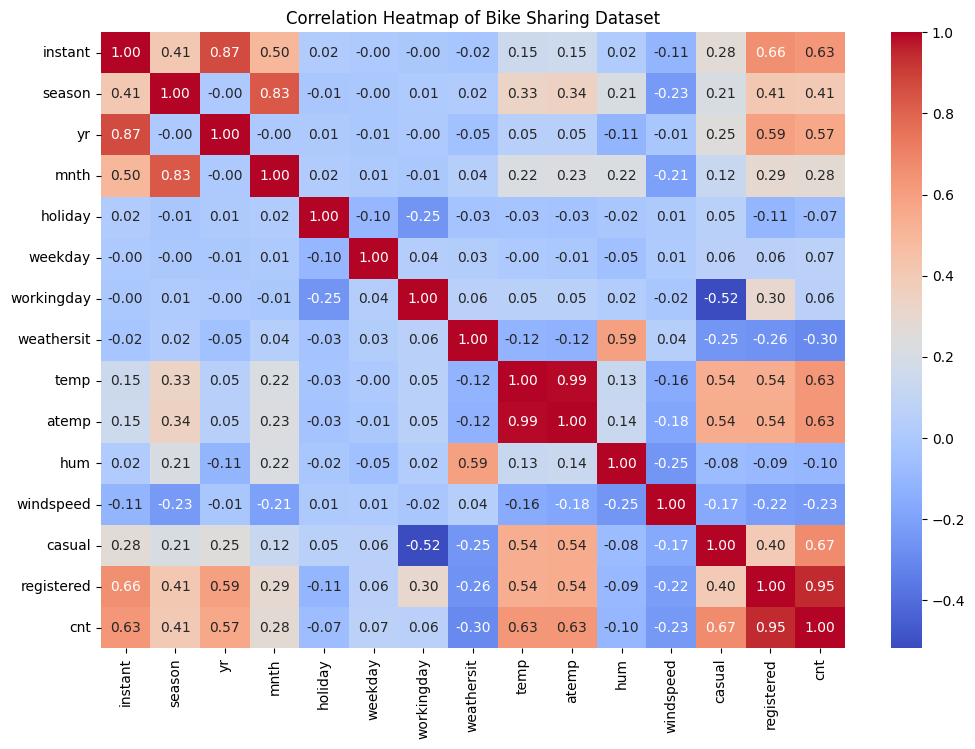

In [82]:
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Bike Sharing Dataset")
plt.show()

## Focused Barplot of Correlations with `cnt`

- To get a **clearer view**, we directly plot correlations of all features against the target `cnt`.  
- This highlights which variables are **most influential** on bike rental demand.  


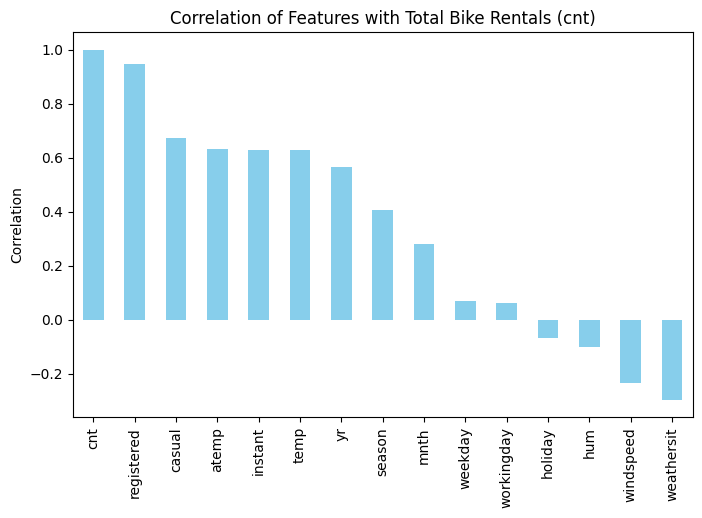

In [83]:
# Focused barplot for cnt correlations
plt.figure(figsize=(8,5))
corr_matrix["cnt"].sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Correlation of Features with Total Bike Rentals (cnt)")
plt.ylabel("Correlation")
plt.show()

# Multiple Linear Regression

## Objective
- To model bike rentals (`cnt`) based on **multiple weather-related features**:
  - Temperature (`temp`)
  - Humidity (`hum`)
  - Wind speed (`windspeed`)

## Why Multiple Regression?
- Simple regression with only `temp` gave us a good start, but real-world scenarios are influenced by **more than one factor**.
- By including `hum` and `windspeed`, we capture additional variability in bike rental counts.


In [84]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define X (features) and y (target)
X = df[["temp", "hum", "windspeed"]]
y = df["cnt"]




In [85]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)


### Interpretation of Results
- **Intercept**: Expected rentals when all features = 0 (not practically meaningful but mathematically important).
- **Coefficients**: Effect of each feature on rentals while keeping others constant:
  - Temperature: Positive (higher temp → more rentals)
  - Humidity: Likely negative (too much humidity discourages rentals)
  - Windspeed: Negative (high wind reduces rentals)
- **R² Score**: Proportion of variance in rentals explained by the model.
- **MSE & MAE**: Measure average prediction error.


In [86]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))


Intercept: 4084.363384452061
Coefficients: [ 6625.53270971 -3100.12313491 -4806.92932481]
R² Score: 0.4608950096446517
MSE: 2020379.2080812175
MAE: 1164.1469477315181


## Visualization of Linear Regression (Temperature vs Bike Rentals)

The scatter plot above shows the relationship between **temperature** (x-axis) and the **total number of bike rentals (`cnt`)** (y-axis).  
- **Blue points** represent the actual data distribution of bike rentals across different temperatures.  
- The **red line** represents the fitted regression line generated by our Linear Regression model.  

### Key Insights:
- The upward slope of the regression line indicates a **positive relationship** between temperature and bike rentals — as the temperature increases, the number of rentals tends to rise.  
- The scattered nature of data points around the line highlights that while temperature is a significant factor, other variables (like humidity, windspeed, seasonality, and weather conditions) also influence bike rental counts.  
- This visualization helps us understand that **temperature is a strong driver** of rental demand, but it should be combined with other factors for more accurate predictions.

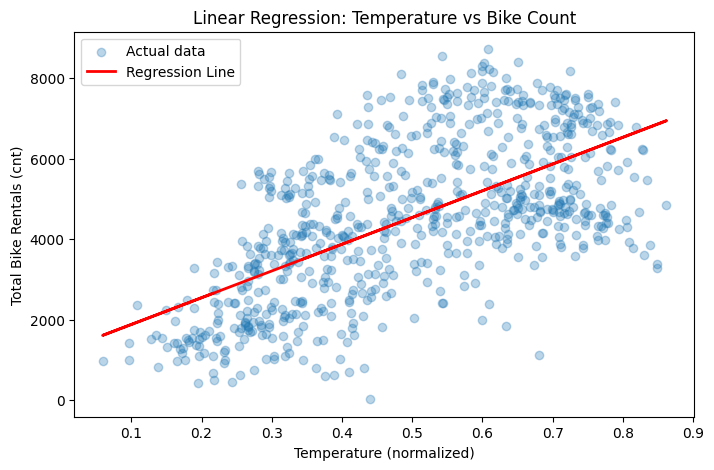

In [87]:
# Fit regression with only temperature
X_temp = df[["temp"]]
model_temp = LinearRegression()
model_temp.fit(X_temp, y)

# Predictions
y_pred_temp = model_temp.predict(X_temp)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_temp, y, alpha=0.3, label="Actual data")
plt.plot(X_temp, y_pred_temp, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Temperature (normalized)")
plt.ylabel("Total Bike Rentals (cnt)")
plt.title("Linear Regression: Temperature vs Bike Count")
plt.legend()
plt.show()


## Ordinary Least Squares (OLS) Regression

To better understand the relationship between **bike rentals (`cnt`)** and the predictors (**temperature, humidity, windspeed**), we used **Ordinary Least Squares (OLS) Regression**.  

- **Independent Variables (X):** `temp`, `hum`, `windspeed` (with an added constant for the intercept).  
- **Dependent Variable (y):** `cnt` (total number of bike rentals).  

### Key Outputs from OLS Summary:
- **Coefficients (coef):**  
  - Show the effect of each variable on bike rentals while keeping others constant.  
  - Example: If the coefficient for `temp` is positive and significant, higher temperatures lead to more rentals.  
- **p-values:**  
  - Indicate statistical significance.  
  - Variables with p-value < 0.05 are considered significant contributors.  
- **R-squared:**  
  - Measures how well the model explains variability in rentals.  
  - Closer to 1 means a stronger explanatory power.  
- **F-statistic:**  
  - Tests the overall significance of the regression model.  


In [88]:
# OLS

# Define features (X) and target (y)
X = df[["temp", "hum", "windspeed"]]
y = df["cnt"]

In [89]:
X = sm.add_constant(X)

In [90]:
ols_model = sm.OLS(y, X).fit()

# Show summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           4.26e-97
Time:                        05:30:01   Log-Likelihood:                -6343.9
No. Observations:                 731   AIC:                         1.270e+04
Df Residuals:                     727   BIC:                         1.271e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4084.3634    337.862     12.089      0.0

## Actual vs Predicted Rentals (OLS Regression)

The scatter plot above compares the **actual bike rentals (`cnt`)** with the **predicted values** from the OLS regression model.  

- Each point represents a day’s rentals.  
- The **red diagonal line** represents a perfect prediction (i.e., `Actual = Predicted`).  
- Points closer to this line indicate more accurate predictions by the model.  


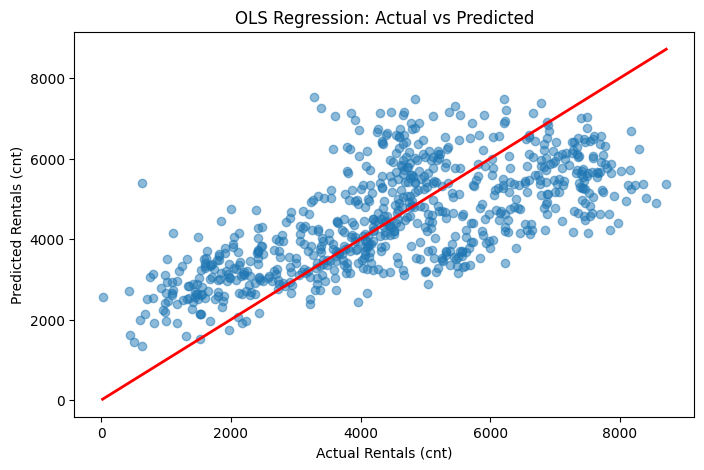

In [91]:
y_pred_ols = ols_model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(y, y_pred_ols, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2)  # perfect line
plt.xlabel("Actual Rentals (cnt)")
plt.ylabel("Predicted Rentals (cnt)")
plt.title("OLS Regression: Actual vs Predicted")
plt.show()

## Residual Analysis (OLS Regression)

The residual plot shows the **errors (residuals = actual − predicted)** against the predicted bike rentals.  

- The **red dashed line** at 0 represents perfect predictions (no error).  
- Points scattered randomly around this line suggest that the model’s assumptions hold well.  
- Patterns or clustering in residuals would indicate issues like:  
  - **Non-linearity** (model not capturing trend properly)  
  - **Heteroscedasticity** (variance of errors not constant)  
  - **Omitted variables** (missing important features)  

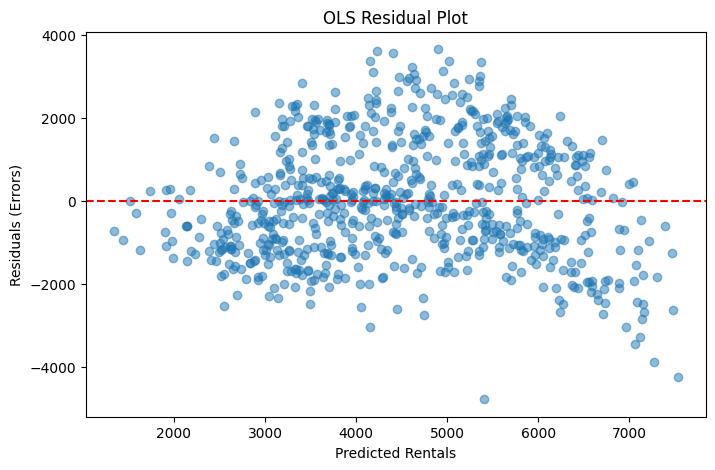

In [92]:
residuals = y - y_pred_ols

plt.figure(figsize=(8,5))
plt.scatter(y_pred_ols, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Rentals")
plt.ylabel("Residuals (Errors)")
plt.title("OLS Residual Plot")
plt.show()

## Coefficient Comparison: Linear Regression vs OLS

This bar chart compares the **feature coefficients** estimated by **Scikit-learn’s Linear Regression** and **Statsmodels OLS**.  

- **Coefficients represent the impact** of each feature on the bike rental count (`cnt`), keeping other variables constant.  
- Both methods should give **very similar values**, since they are mathematically solving the same regression problem.  
- Minor differences may arise due to numerical precision and inclusion of a constant term in OLS.


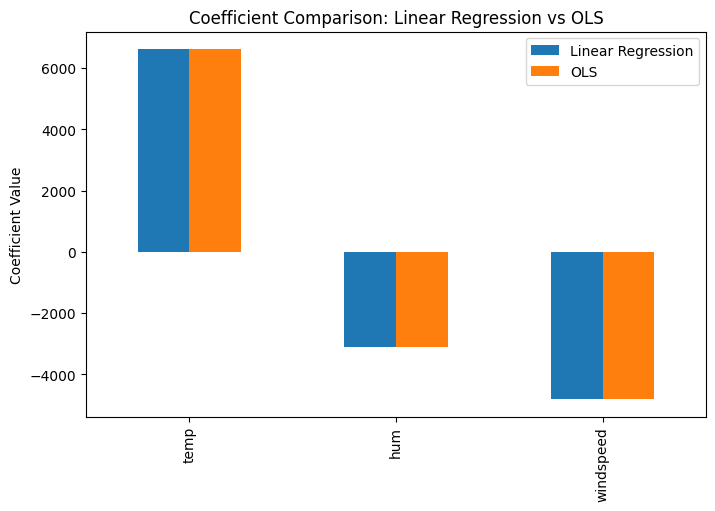

In [93]:
coeffs_lr = model.coef_
coeffs_ols = ols_model.params[1:]  # exclude constant

pd.DataFrame({
    "Linear Regression": coeffs_lr,
    "OLS": coeffs_ols
}, index=["temp", "hum", "windspeed"]).plot(kind="bar", figsize=(8,5))
plt.title("Coefficient Comparison: Linear Regression vs OLS")
plt.ylabel("Coefficient Value")
plt.show()


# Conclusion

The Bike Sharing dataset was analyzed to understand the factors affecting the total daily rentals (`cnt`).  

## Key Findings:
- **Correlation Analysis** revealed that **temperature** is strongly positively correlated with bike rentals, while **humidity** is negatively correlated. Windspeed showed only a weak effect.  
- **Simple Linear Regression & OLS** models were built using `temp`, `hum`, and `windspeed` as predictors. Both approaches produced consistent coefficients and similar predictive power.  
- **Visualization of predictions** confirmed that the models capture the upward trend with temperature, though residual analysis indicated some **non-linearity and variance** not fully explained by the linear model.  
- **Coefficient comparison** between Scikit-learn Linear Regression and Statsmodels OLS showed nearly identical results, validating the correctness of implementation.

## Overall Insight:
- **Temperature is the most significant factor** influencing bike rentals. Warmer days see higher demand.  
- **High humidity reduces rentals**, likely due to discomfort in riding conditions.  
- **Windspeed has little impact** compared to other features.  

## Limitations:
- The models only considered three predictors (`temp`, `hum`, `windspeed`).  
- Other important factors like seasonality, weather situations, holidays, and working days were ignored, which may limit predictive accuracy.  

## Next Steps:
- Include **season, weekday, and weather condition variables** for a more comprehensive model.  
- Try **non-linear models (Polynomial Regression, Random Forest, Gradient Boosting)** to capture complex patterns.  
- Evaluate models using **train-test split and cross-validation** for generalization.  
